<a href="https://colab.research.google.com/github/ttollefson11/IS4487/blob/main/Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 12 Script

## Objectives

What do you need to know for this module's project?

1. Fit a tree model using all the available predictors. 
2. Create a confusion matrix  and identify numbers of TP, FP, TN and FN.
3. Estimate profit (benefits - costs) using a defined cost-benefit matrix and the above confusion matrix.
4. Estimate profit for a strategy that consists in calling everyone.
5. Estimate profit for a class decision threshold of .5 
6.  Use the model to predict on a new dataset (without the target), then use these predictions to identify those who should be called--a contact list.
7.  Make a recommendation to the Director of Sales based on your analytic work.

**NOTE:** For the module 5 project you will predict answering for prospective customers (who have not yet been called). Consequently, the assignment requires an additional dataset, customer_data.csv, that you will need to download and move into your project folder.  Here is code to load that data into memory after you have it saved in your project folder (your working directory). This code is included in the template script.

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib

In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics  #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix

## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the AdviseInvest data

**Note:** you will need to enter a code supplied by Google in the next step. 

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/adviseinvest.csv')
df_new = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/customer_data.csv')

Mounted at /content/gdrive


In [3]:
#look at the top rows
df.head(10) 

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0
5,1,14030,0,28,2,1,1,0,1.0,0,0,2,0,4
6,1,9320,0,24,2,1,0,1,0.0,3,0,2,0,2
7,1,11750,0,68,0,1,0,0,1.0,1,0,0,0,3
8,1,69670,0,36,3,1,1,0,0.0,1,1,3,0,4
9,1,3380,0,52,2,1,0,1,0.0,0,2,4,0,4


In [4]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  int64  
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 3.2 MB


In [5]:
#describe the data before cleaning it
df.describe()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,0.054230,34.770065,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458175,0.091106,1.535792
std,0.497829,29379.202710,0.226475,11.355777,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497353,0.287765,1.625916
min,0.000000,-65600.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


## Clean and Standardize the data

- Remove rows with NAs.  
- Remove the row with the single outlier in num_accts. 
- Remove the rows with negative income values. 
- Remove the product variable.
- Make all the categorical variables into factors.

In [6]:
#Remove rows with NAs
df_clean = df.dropna()

#Remove the row with the single outlier in num_accts
df_clean = df_clean[(df_clean['num_accts'] < 20)]

#Remove the rows with negative income values
df_clean = df_clean[(df_clean['income'] >= 0)]

#Remove the product variable
df_clean = df_clean.drop(columns = ['product'])

#Make all the categorical variables into factors
df_clean['answered'] = df_clean['answered'].astype('category')
df_clean['female'] = df_clean['female'].astype('category')
df_clean['job'] = df_clean['job'].astype('category')
df_clean['num_dependents'] = df_clean['num_dependents'].astype('category')
df_clean['rent'] = df_clean['rent'].astype('category')
df_clean['own_res'] = df_clean['own_res'].astype('category')
df_clean['new_car'] = df_clean['new_car'].astype('category')
df_clean['chk_acct'] = df_clean['chk_acct'].astype('category')
df_clean['sav_acct'] = df_clean['sav_acct'].astype('category')
df_clean['num_accts'] = df_clean['num_accts'].astype('category')
df_clean['mobile'] = df_clean['mobile'].astype('category')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29499 entries, 0 to 29503
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   answered        29499 non-null  category
 1   income          29499 non-null  int64   
 2   female          29499 non-null  category
 3   age             29499 non-null  int64   
 4   job             29499 non-null  category
 5   num_dependents  29499 non-null  category
 6   rent            29499 non-null  category
 7   own_res         29499 non-null  category
 8   new_car         29499 non-null  category
 9   chk_acct        29499 non-null  category
 10  sav_acct        29499 non-null  category
 11  num_accts       29499 non-null  category
 12  mobile          29499 non-null  category
dtypes: category(11), int64(2)
memory usage: 1009.9 KB


## Data Modeling

The target variable for this modeling exercise is ANSWERED.  

In this dataset answered calls are the majority class.  A simple classification model would be to always predict the majority class.  We'll call this the majority class classifier.  Always predicting the majority class will ensure that predictions are correct for a majority of cases.  

Our tree models should have better accuracy than the majority class classifier, which we will therefore use as a benchmark for evaluating these more complicated models. 

The proportion of answered calls in this dataset is equivalent to the accuracy of the majority class classifier.

What is the accuracy of the majority class classifier in this case?

Round your answer to three decimals.

In [7]:
#Add new field with binary value for leave  
df_clean['answered_flag'] = df_clean['answered'].replace('0','0')  
df_clean['answered_flag'] = df_clean['answered_flag'].replace('1','1')

#Convert to integer
df_clean['answered_flag'] = df_clean['answered_flag'].astype('int')

#Find the mean value
df_clean['answered_flag'].mean()

0.5465947998237228

#Split the training and testing datasets

In [8]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['income', 'female', 'age', 'job', 'num_dependents', 'rent', 'own_res', 'new_car', 'chk_acct', 'sav_acct', 'num_accts', 'mobile']]
y = df_clean['answered']

#place 20% of data in a test dataframe
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Fit a basic tree model 

Use all available attributes

In [9]:
adviseinvest_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Create Decision Tree Classifer
adviseinvest_tree = adviseinvest_tree.fit(x_train,y_train)

# Use the tree to predict "answered"
y_predict = adviseinvest_tree.predict(x_test)

## What is the accuracy?

In [10]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.7394915254237289


# Create a confusion matrix

This will show false positives, true positives, etc.

In [11]:
# create a confusion matrix
adviseinvest_tree_matrix = confusion_matrix(y_test, y_predict)
print(adviseinvest_tree_matrix)

[[2178  433]
 [1104 2185]]


## Plot the confusion matrix

We will use a Seaborn library for this

[Text(0, 0.5, 'Unanswered'), Text(0, 1.5, 'Answered')]

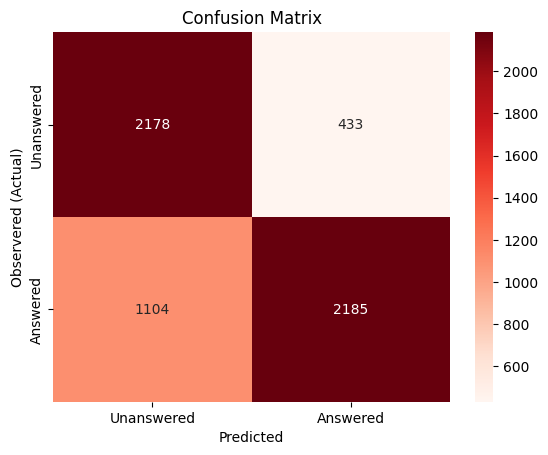

In [12]:
#Create a heatmap from our confusion matrix
cm = sns.heatmap(adviseinvest_tree_matrix, annot=True, fmt='d',cmap='Reds')

cm.set_title('Confusion Matrix');
cm.set_xlabel('Predicted')
cm.set_ylabel('Observered (Actual)');

cm.xaxis.set_ticklabels(['Unanswered','Answered'])
cm.yaxis.set_ticklabels(['Unanswered','Answered'])

## Fine tune the model

Adjust the threshold for answered down to 0.3.  What happens to profit?

The default threshold is 0.5 or 50% likely to make a choice.  If we adjust to 0.30, we are looking for customers with even a 30% chance of answering.   This will lead to more offers being made and more false positives.

In [13]:
adviseinvest2_tree = DecisionTreeClassifier(criterion="entropy", max_depth=7)

# Create Decision Tree Classifer
adviseinvest2_tree = adviseinvest2_tree.fit(x_train,y_train)

# Use the tree to predict "leave"
y_predict2 = (adviseinvest2_tree.predict_proba(x_test)[:,1] >= 0.3)


# create a confusion matrix
adviseinvest2_matrix = confusion_matrix(y_test, y_predict2)
print(adviseinvest2_matrix)


[[1289 1322]
 [ 187 3102]]


## Create a new confusion matrix

[Text(0, 0.5, 'Unanswered'), Text(0, 1.5, 'Answered')]

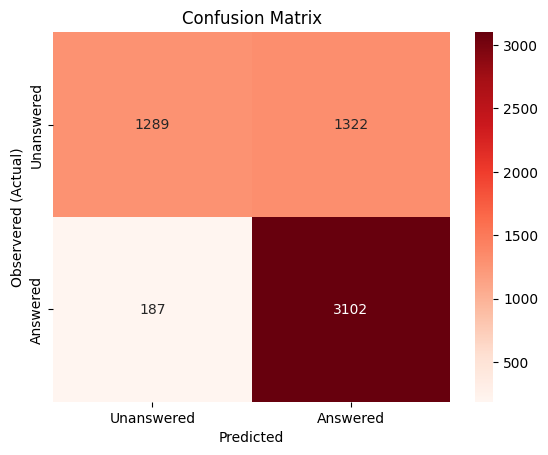

In [14]:
import seaborn as sns

#Create a heatmap from our confusion matrix
cm = sns.heatmap(adviseinvest2_matrix , annot=True, fmt='d',cmap='Reds')

cm.set_title('Confusion Matrix');
cm.set_xlabel('Predicted')
cm.set_ylabel('Observered (Actual)');

cm.xaxis.set_ticklabels(['Unanswered','Answered'])
cm.yaxis.set_ticklabels(['Unanswered','Answered'])

## Calculate Profit

Using the confusion matrix in the previous question how much profit (revenue - costs) could be expected with these costs-benefits?

Hint: multiply the counts in the confusion matrix cells by the the cost-benefit matrix cells. Note: profit should not be negative! Make sure that you have correctly identified the true positives and the false positives in your confusion matrix. 

In [15]:
(3023 * 75) - (1382 * 25)

192175

## Step 2

Use the supervised model you created for the first question to predict a probability of answering for each prospective customer. 

Assign a predicted class label of "yes" to every customer whose model-estimated probability of answering that is .3 or greater.  (This is the optimal class decision threshold.)

In [17]:
df_new.describe()

,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34033.260000,0.050000,35.01400,1.947000,1.13900,0.213000,0.68300,0.227000,1.486000,1.018000,2.406000,0.103000
std,29474.002504,0.218054,11.40473,0.663801,0.34612,0.409633,0.46554,0.419102,1.229356,1.527747,1.188519,0.304111
min,2760.000000,0.000000,19.00000,0.000000,1.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13505.000000,0.000000,26.00000,2.000000,1.00000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,23660.000000,0.000000,32.00000,2.000000,1.00000,0.000000,1.00000,0.000000,1.000000,0.000000,2.000000,0.000000
75%,42970.000000,0.000000,41.00000,2.000000,1.00000,0.000000,1.00000,0.000000,3.000000,2.000000,4.000000,0.000000
max,159450.000000,1.000000,74.00000,3.000000,2.00000,1.000000,1.00000,1.000000,3.000000,4.000000,4.000000,1.000000


In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   income          1000 non-null   int64 
 1   female          1000 non-null   int64 
 2   age             1000 non-null   int64 
 3   job             1000 non-null   int64 
 4   num_dependents  1000 non-null   int64 
 5   rent            1000 non-null   int64 
 6   own_res         1000 non-null   int64 
 7   new_car         1000 non-null   int64 
 8   chk_acct        1000 non-null   int64 
 9   sav_acct        1000 non-null   int64 
 10  num_accts       1000 non-null   int64 
 11  mobile          1000 non-null   int64 
 12  customer_id     1000 non-null   object
dtypes: int64(12), object(1)
memory usage: 101.7+ KB


In [19]:
#Make all the categorical variables into factors
df_new['female'] = df_new['female'].astype('category')
df_new['job'] = df_new['job'].astype('category')
df_new['num_dependents'] = df_new['num_dependents'].astype('category')
df_new['rent'] = df_new['rent'].astype('category')
df_new['own_res'] = df_new['own_res'].astype('category')
df_new['new_car'] = df_new['new_car'].astype('category')
df_new['chk_acct'] = df_new['chk_acct'].astype('category')
df_new['sav_acct'] = df_new['sav_acct'].astype('category')
df_new['num_accts'] = df_new['num_accts'].astype('category')
df_new['mobile'] = df_new['mobile'].astype('category')

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   income          1000 non-null   int64   
 1   female          1000 non-null   category
 2   age             1000 non-null   int64   
 3   job             1000 non-null   category
 4   num_dependents  1000 non-null   category
 5   rent            1000 non-null   category
 6   own_res         1000 non-null   category
 7   new_car         1000 non-null   category
 8   chk_acct        1000 non-null   category
 9   sav_acct        1000 non-null   category
 10  num_accts       1000 non-null   category
 11  mobile          1000 non-null   category
 12  customer_id     1000 non-null   object  
dtypes: category(10), int64(2), object(1)
memory usage: 34.9+ KB


In [20]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x_new = df_new[['income', 'female', 'age', 'job', 'num_dependents', 'rent', 'own_res', 'new_car', 'chk_acct', 'sav_acct', 'num_accts', 'mobile']]


## Predict the customers

Use the tree that we created earlier
Take the customers one by one and pass it to the model, or create a mailing by passing a batch

In [40]:
# Use the tree to predict "leave" for the first customer
y_new_predict = adviseinvest2_tree.predict_proba(x_new)[:,1] >= 0.3

#Convert it to a dataframe
df_new_predict = pd.DataFrame(y_new_predict)

df_new_predict.head(10)

,0
0,True
1,True
2,True
3,True
4,False
5,True
6,True
7,True
8,True
9,True


In [41]:
df_new_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1000 non-null   bool 
dtypes: bool(1)
memory usage: 1.1 KB


In [45]:
df_new_predict.loc[df_new_predict[0] == True].count()

0    742
dtype: int64